In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import dataset

lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_data.info()
lead_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

(9240, 37)

In [5]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
#EDA

In [8]:
##Data cleaning

In [9]:
# dropping added by sales variable

lead_data.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
               'Lead Quality', 'Tags'], 1, inplace=True)

In [10]:
#converting 'select' to NAN and dropping ['Prospect ID', 'Lead Number']

lead_data.drop(['Prospect ID', 'Lead Number'],1, inplace=True)
lead_data = lead_data.replace('Select', np.nan)

In [11]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,NaN,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,NaN,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,NaN,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,NaN,Mumbai,No,No,Modified


In [12]:
#checking the null data percentage

round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
#Removal of columns where null percentage is greater than 45%

for i in lead_data.columns:
    if (100*(lead_data[i].isnull().sum()/len(lead_data.index))) >= 45:
        lead_data.drop(i, 1, inplace=True)

In [14]:
lead_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [15]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [16]:
###handeling the missing values

In [17]:
lead_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Germany                    4
Canada                     4
Kuwait                     4
Nigeria                    4
Sweden                     3
Asia/Pacific Region        2
China                      2
Philippines                2
Uganda                     2
Italy                      2
Netherlands                2
Ghana                      2
Belgium                    2
Bangladesh                 2
Kenya                      1
Indonesia                  1
Denmark                    1
Malaysia                   1
Switzerland                1
Tanzania                   1
Vietnam       

In [18]:
# We can drop the column Country as India has around more than 80 percent of the data (highly skewed)

In [19]:
lead_data.drop('Country', 1, inplace=True)

In [20]:
lead_data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Not Specified')

In [22]:
#combining Management Specializations because they show similar trends

lead_data['Specialization'] = lead_data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

In [23]:
lead_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'Unemployed')


In [25]:
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [26]:
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [27]:
lead_data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [28]:
lead_data['City'] = lead_data['City'].replace(np.nan, 'Mumbai')

In [29]:
lead_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
youtubechannel          1
blog                    1
WeLearn                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [30]:
#replacing NaN and combining low frequency values to Others

lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.nan,'Others')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google','Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('Facebook','Social Media')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

In [31]:
lead_data['Last Activity'].value_counts(dropna=False)

lead_data['Last Activity'] = lead_data['Last Activity'].replace(np.nan,'Others')
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [32]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [33]:
lead_data = lead_data.dropna()

In [34]:
lead_data['Do Not Call'].value_counts(dropna=False)


No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [35]:
lead_data.drop('Do Not Call', 1 , inplace=True)

In [36]:
lead_data['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [37]:
lead_data['Search'].value_counts(dropna=False)
lead_data.drop('Search', 1 , inplace=True)

In [38]:
lead_data['Newspaper Article'].value_counts(dropna=False)
lead_data.drop('Newspaper Article', 1 , inplace=True)

In [39]:
lead_data['X Education Forums'].value_counts(dropna=False)
lead_data.drop('X Education Forums', 1 , inplace=True)

In [40]:
lead_data['Newspaper'].value_counts(dropna=False)
lead_data.drop('Newspaper', 1 , inplace=True)

In [41]:
lead_data['Digital Advertisement'].value_counts(dropna=False)
lead_data.drop('Digital Advertisement', 1 , inplace=True)

In [42]:
lead_data['Through Recommendations'].value_counts(dropna=False)
lead_data.drop('Through Recommendations', 1 , inplace=True)

In [43]:
lead_data['Receive More Updates About Our Courses'].value_counts(dropna=False)
lead_data.drop('Receive More Updates About Our Courses', 1 , inplace=True)

In [44]:
lead_data['Update me on Supply Chain Content'].value_counts(dropna=False)
lead_data.drop('Update me on Supply Chain Content', 1 , inplace=True)

In [45]:
lead_data['Get updates on DM Content'].value_counts(dropna=False)
lead_data.drop('Get updates on DM Content', 1 , inplace=True)

In [46]:
lead_data['I agree to pay the amount through cheque'].value_counts(dropna=False)
lead_data.drop('I agree to pay the amount through cheque', 1 , inplace=True)

In [47]:
lead_data['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [48]:
lead_data['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
View in browser link Clicked       1
Email Received                     1
Approached upfront                 1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [49]:
#clubbing lower frequency values

lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [50]:
lead_data['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [51]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Converted                                      9103 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9103 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Last Activity                                  9103 non-null   object 
 8   Specialization                                 9103 non-null   object 
 9   What is your current occupation                9103 

In [52]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

38.02043282434362

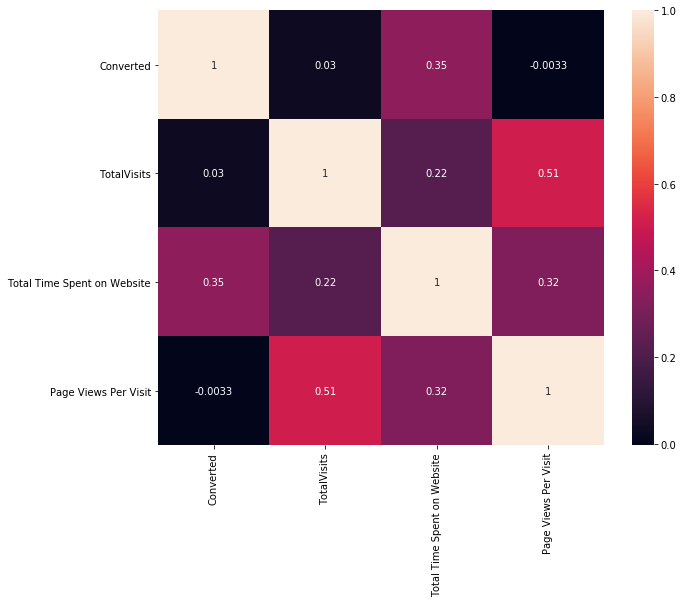

In [53]:
plt.figure(figsize=(10,8))

# sns.heatmap(lead_data.corr(), cmap="YlGnBu", annot=True)
sns.heatmap(lead_data.corr(),annot=True)
plt.show()

In [54]:
#outliers

In [55]:
lead_data.shape

(9103, 15)

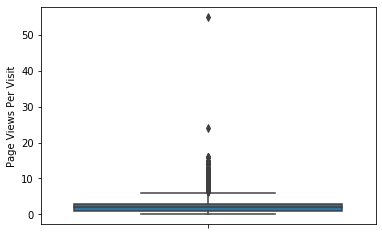

In [56]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead_data['Page Views Per Visit'])
plt.show()


In [57]:
lead_data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

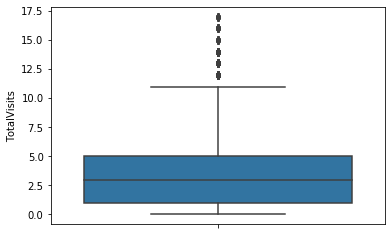

In [58]:
 #Remove top & bottom 1% of the Column Outlier values

Q3 = lead_data.TotalVisits.quantile(0.99)
lead_data = lead_data[(lead_data.TotalVisits <= Q3)]
Q1 = lead_data.TotalVisits.quantile(0.01)
lead_data = lead_data[(lead_data.TotalVisits >= Q1)]
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()

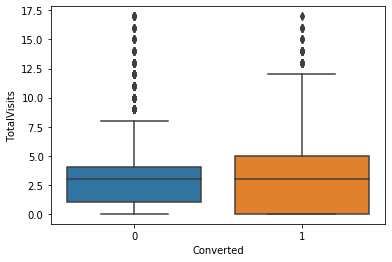

In [59]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)
plt.show()

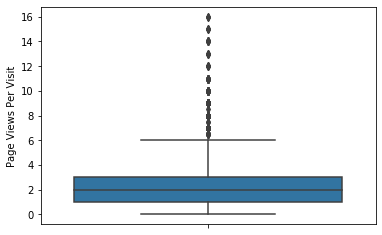

In [60]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead_data['Page Views Per Visit'])
plt.show()

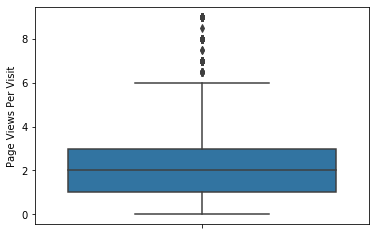

In [61]:

Q3 = lead_data['Page Views Per Visit'].quantile(0.99)
lead_data = lead_data[lead_data['Page Views Per Visit'] <= Q3]
Q1= lead_data['Page Views Per Visit'].quantile(0.01)
lead_data = lead_data[lead_data['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lead_data['Page Views Per Visit'])
plt.show()

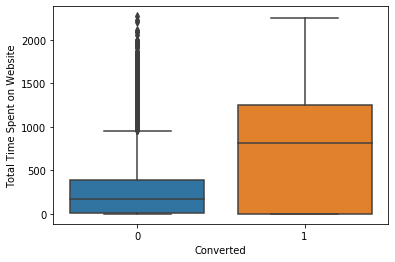

In [62]:
# time spent vs converted
sns.boxplot(x=lead_data.Converted, y=lead_data['Total Time Spent on Website'])
plt.show()

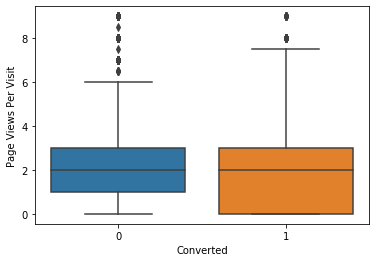

In [63]:
# Page Views Per Visit vs Converted
sns.boxplot(x=lead_data.Converted,y=lead_data['Page Views Per Visit'])
plt.show()

In [64]:
categoric_cols= lead_data.select_dtypes(include=['object']).columns
categoric_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Magazine', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [65]:
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[varlist] = lead_data[varlist].apply(binary_map)


#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(lead_data[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

lead_data = pd.concat([lead_data,dummy],1)

dummy = pd.get_dummies(lead_data['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
lead_data = pd.concat([lead_data, dummy], axis = 1)


dummy = pd.get_dummies(lead_data['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
lead_data = pd.concat([lead_data, dummy], axis = 1)

dummy = pd.get_dummies(lead_data['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
lead_data = pd.concat([lead_data, dummy], axis = 1)

dummy = pd.get_dummies(lead_data['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
lead_data = pd.concat([lead_data, dummy], axis = 1)


In [66]:
lead_data.drop(categoric_cols,1,inplace = True)

In [67]:
lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [68]:
y = lead_data['Converted']

y.head()

X=lead_data.drop('Converted', axis=1)

In [69]:
#splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [70]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

In [71]:
#scaling the data

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [72]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [73]:
rfe.support_


array([False,  True, False, False,  True, False,  True, False,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True,  True, False,  True, False, False,  True,
        True, False, False,  True, False,  True, False,  True, False,
        True, False, False, False,  True, False,  True, False, False,
        True,  True, False, False])

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 4),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 25),
 ('City_Other Cities of Maharashtra', False, 28),
 ('City_Other Metro Cities', False, 30),
 ('City_Thane & Outskirts', False, 29),
 ('City_Tier II Cities', False, 27),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 5),
 ('Specialization_E-Business', False, 6),
 ('Specialization_E-COMMERCE', False, 2),
 ('Specialization_International Business', True, 1),
 ('Sp

In [75]:
#RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Rural and Agribusiness', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [76]:
X_train.columns[~rfe.support_]


Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Other', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Media and Advertising',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Ac

In [77]:
#Building model

In [78]:
#model 1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.6
Date:                Mon, 07 Sep 2020   Deviance:                       5247.3
Time:                        13:45:56   Pearson chi2:                 6.55e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5708      0.631      0.904      0.366      -0.667       1.808
Total Time Spent on Website                              1.0827      0.040     27.148      0.000       1.004       1.161
Lead Origin_Lead Add Form                                2.8349      0.250     11.357      0.000       2.346       3.324
What is your current occupation_Housewife               22.4585   1.81e+04      0.001      0.999   -3.54e+04    3.54e+04
What is your current occupation_Student                 -0.4118      0.670     -0.615      0.539      -1.725       0.901
What is your current occupation_Unemployed              -0.6988      0.627     -1.115      0.265      -1.927       0.530
What is your current occupation_Working Professional     2.0547      0.655      3.136      0.002       0.771       3.339
Specialization_Banking, Investment And Insurance         0.7113      0.189      3.773      0.000       0.342       1.081
Specialization_International Business                    0.4782      0.240      1.990      0.047       0.007       0.949
Specialization_Management_Specializations                0.3907      0.081      4.825      0.000       0.232       0.549
Specialization_Rural and Agribusiness                    0.7892      0.375      2.106      0.035       0.055       1.524
Lead Source_Direct Traffic                              -1.7217      0.125    -13.801      0.000      -1.966      -1.477
Lead Source_Google                                      -1.1816      0.115    -10.300      0.000      -1.406      -0.957
Lead Source_Organic Search                              -1.2855      0.136     -9.457      0.000      -1.552      -1.019
Lead Source_Referral Sites                              -1.3514      0.338     -3.997      0.000      -2.014      -0.689
Lead Source_Welingak Website                             2.4996      1.041      2.401      0.016       0.459       4.540
Last Activity_Email Bounced                             -1.3860      0.323     -4.295      0.000      -2.019      -0.754
Last Activity_Olark Chat Conversation                   -0.8922      0.196     -4.558      0.000      -1.276      -0.509
Last Activity_SMS Sent                                   1.2240      0.075     16.393      0.000       1.078       1.370
Last Notable Activity_Modified                          -0.8449      0.083    -10.168      0.000      -1.008      -0.682
Last Notable Activity_Olark Chat Conversation           -1.1770      0.425     -2.772      0.006      -2.009      -0.345
========================================================================================================================
"""

In [79]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,490.88
5,What is your current occupation_Unemployed,41.42
6,What is your current occupation_Working Profes...,32.63
4,What is your current occupation_Student,10.95
11,Lead Source_Direct Traffic,2.56
12,Lead Source_Google,2.44
2,Lead Origin_Lead Add Form,1.78
17,Last Activity_Olark Chat Conversation,1.75
13,Lead Source_Organic Search,1.71
9,Specialization_Management_Specializations,1.43


In [80]:
# p-value of variable What is your current occupation_Housewife is high, so we can drop it.

col = col.drop('What is your current occupation_Housewife',1)


In [81]:
# model 2

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.3
Date:                Mon, 07 Sep 2020   Deviance:                       5252.5
Time:                        13:45:57   Pearson chi2:                 6.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1477      0.565      2.033      0.042       0.041       2.254
Total Time Spent on Website                              1.0808      0.040     27.133      0.000       1.003       1.159
Lead Origin_Lead Add Form                                2.8379      0.250     11.372      0.000       2.349       3.327
What is your current occupation_Student                 -0.9892      0.607     -1.630      0.103      -2.179       0.200
What is your current occupation_Unemployed              -1.2773      0.559     -2.285      0.022      -2.373      -0.182
What is your current occupation_Working Professional     1.4764      0.590      2.501      0.012       0.319       2.634
Specialization_Banking, Investment And Insurance         0.7107      0.188      3.771      0.000       0.341       1.080
Specialization_International Business                    0.4779      0.240      1.989      0.047       0.007       0.949
Specialization_Management_Specializations                0.3897      0.081      4.818      0.000       0.231       0.548
Specialization_Rural and Agribusiness                    0.7863      0.375      2.099      0.036       0.052       1.521
Lead Source_Direct Traffic                              -1.7222      0.125    -13.806      0.000      -1.967      -1.478
Lead Source_Google                                      -1.1770      0.115    -10.267      0.000      -1.402      -0.952
Lead Source_Organic Search                              -1.2760      0.136     -9.405      0.000      -1.542      -1.010
Lead Source_Referral Sites                              -1.3485      0.338     -3.990      0.000      -2.011      -0.686
Lead Source_Welingak Website                             2.4968      1.041      2.399      0.016       0.457       4.537
Last Activity_Email Bounced                             -1.3861      0.323     -4.295      0.000      -2.019      -0.754
Last Activity_Olark Chat Conversation                   -0.8991      0.196     -4.592      0.000      -1.283      -0.515
Last Activity_SMS Sent                                   1.2233      0.075     16.389      0.000       1.077       1.370
Last Notable Activity_Modified                          -0.8446      0.083    -10.171      0.000      -1.007      -0.682
Last Notable Activity_Olark Chat Conversation           -1.1691      0.425     -2.754      0.006      -2.001      -0.337
========================================================================================================================
"""

In [82]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,357.11
4,What is your current occupation_Unemployed,29.98
5,What is your current occupation_Working Profes...,23.83
3,What is your current occupation_Student,8.19
10,Lead Source_Direct Traffic,2.56
11,Lead Source_Google,2.44
2,Lead Origin_Lead Add Form,1.78
16,Last Activity_Olark Chat Conversation,1.75
12,Lead Source_Organic Search,1.71
8,Specialization_Management_Specializations,1.43


In [83]:
#p-value of variable What is your current occupation_Student is high, so we can drop it.

col = col.drop('What is your current occupation_Student',1)

In [84]:
# model 3

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.6
Date:                Mon, 07 Sep 2020   Deviance:                       5255.2
Time:                        13:45:57   Pearson chi2:                 6.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3110      0.233      1.338      0.181      -0.145       0.767
Total Time Spent on Website                              1.0819      0.040     27.165      0.000       1.004       1.160
Lead Origin_Lead Add Form                                2.8440      0.249     11.399      0.000       2.355       3.333
What is your current occupation_Unemployed              -0.4424      0.222     -1.995      0.046      -0.877      -0.008
What is your current occupation_Working Professional     2.3101      0.294      7.868      0.000       1.735       2.885
Specialization_Banking, Investment And Insurance         0.7059      0.188      3.746      0.000       0.337       1.075
Specialization_International Business                    0.4735      0.240      1.970      0.049       0.002       0.945
Specialization_Management_Specializations                0.3909      0.081      4.833      0.000       0.232       0.549
Specialization_Rural and Agribusiness                    0.7697      0.375      2.053      0.040       0.035       1.505
Lead Source_Direct Traffic                              -1.7196      0.125    -13.793      0.000      -1.964      -1.475
Lead Source_Google                                      -1.1765      0.115    -10.266      0.000      -1.401      -0.952
Lead Source_Organic Search                              -1.2717      0.136     -9.376      0.000      -1.538      -1.006
Lead Source_Referral Sites                              -1.3478      0.338     -3.987      0.000      -2.010      -0.685
Lead Source_Welingak Website                             2.4936      1.041      2.396      0.017       0.453       4.534
Last Activity_Email Bounced                             -1.3935      0.323     -4.319      0.000      -2.026      -0.761
Last Activity_Olark Chat Conversation                   -0.8988      0.196     -4.593      0.000      -1.282      -0.515
Last Activity_SMS Sent                                   1.2212      0.075     16.359      0.000       1.075       1.367
Last Notable Activity_Modified                          -0.8415      0.083    -10.144      0.000      -1.004      -0.679
Last Notable Activity_Olark Chat Conversation           -1.1773      0.425     -2.773      0.006      -2.009      -0.345
========================================================================================================================
"""

In [85]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.42
4,What is your current occupation_Working Profes...,3.79
3,What is your current occupation_Unemployed,3.70
9,Lead Source_Direct Traffic,2.56
10,Lead Source_Google,2.44
2,Lead Origin_Lead Add Form,1.78
15,Last Activity_Olark Chat Conversation,1.75
11,Lead Source_Organic Search,1.71
7,Specialization_Management_Specializations,1.43
1,Total Time Spent on Website,1.33


In [86]:
#p-value of variable Specialization_International Business, so we can drop it.

col = col.drop('Specialization_International Business',1)

In [87]:
# model 4

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6249
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.5
Date:                Mon, 07 Sep 2020   Deviance:                       5259.0
Time:                        13:45:58   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3209      0.232      1.381      0.167      -0.134       0.776
Total Time Spent on Website                              1.0816      0.040     27.184      0.000       1.004       1.160
Lead Origin_Lead Add Form                                2.8590      0.249     11.459      0.000       2.370       3.348
What is your current occupation_Unemployed              -0.4437      0.222     -2.002      0.045      -0.878      -0.009
What is your current occupation_Working Professional     2.3083      0.293      7.870      0.000       1.733       2.883
Specialization_Banking, Investment And Insurance         0.6732      0.188      3.588      0.000       0.306       1.041
Specialization_Management_Specializations                0.3587      0.079      4.536      0.000       0.204       0.514
Specialization_Rural and Agribusiness                    0.7401      0.374      1.976      0.048       0.006       1.474
Lead Source_Direct Traffic                              -1.6860      0.123    -13.676      0.000      -1.928      -1.444
Lead Source_Google                                      -1.1542      0.114    -10.140      0.000      -1.377      -0.931
Lead Source_Organic Search                              -1.2533      0.135     -9.280      0.000      -1.518      -0.989
Lead Source_Referral Sites                              -1.3452      0.338     -3.986      0.000      -2.007      -0.684
Lead Source_Welingak Website                             2.4749      1.041      2.378      0.017       0.435       4.515
Last Activity_Email Bounced                             -1.3987      0.323     -4.335      0.000      -2.031      -0.766
Last Activity_Olark Chat Conversation                   -0.9031      0.196     -4.617      0.000      -1.287      -0.520
Last Activity_SMS Sent                                   1.2207      0.075     16.357      0.000       1.074       1.367
Last Notable Activity_Modified                          -0.8450      0.083    -10.195      0.000      -1.007      -0.683
Last Notable Activity_Olark Chat Conversation           -1.1815      0.424     -2.787      0.005      -2.012      -0.351
========================================================================================================================
"""

In [88]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.39
4,What is your current occupation_Working Profes...,3.79
3,What is your current occupation_Unemployed,3.70
8,Lead Source_Direct Traffic,2.51
9,Lead Source_Google,2.43
2,Lead Origin_Lead Add Form,1.77
14,Last Activity_Olark Chat Conversation,1.75
10,Lead Source_Organic Search,1.70
6,Specialization_Management_Specializations,1.37
1,Total Time Spent on Website,1.33


In [89]:
#p-value of variable Specialization_Rural and Agribusiness is high, so we can drop it.

col = col.drop('Specialization_Rural and Agribusiness',1)

In [90]:
# model 5

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6250
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2631.4
Date:                Mon, 07 Sep 2020   Deviance:                       5262.7
Time:                        13:45:58   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3471      0.232      1.498      0.134      -0.107       0.801
Total Time Spent on Website                              1.0811      0.040     27.191      0.000       1.003       1.159
Lead Origin_Lead Add Form                                2.8613      0.249     11.469      0.000       2.372       3.350
What is your current occupation_Unemployed              -0.4626      0.221     -2.092      0.036      -0.896      -0.029
What is your current occupation_Working Professional     2.2859      0.293      7.808      0.000       1.712       2.860
Specialization_Banking, Investment And Insurance         0.6565      0.187      3.504      0.000       0.289       1.024
Specialization_Management_Specializations                0.3424      0.079      4.358      0.000       0.188       0.496
Lead Source_Direct Traffic                              -1.6722      0.123    -13.597      0.000      -1.913      -1.431
Lead Source_Google                                      -1.1466      0.114    -10.090      0.000      -1.369      -0.924
Lead Source_Organic Search                              -1.2301      0.134     -9.156      0.000      -1.493      -0.967
Lead Source_Referral Sites                              -1.3471      0.337     -3.993      0.000      -2.008      -0.686
Lead Source_Welingak Website                             2.4690      1.041      2.372      0.018       0.429       4.509
Last Activity_Email Bounced                             -1.3966      0.323     -4.325      0.000      -2.029      -0.764
Last Activity_Olark Chat Conversation                   -0.9089      0.196     -4.648      0.000      -1.292      -0.526
Last Activity_SMS Sent                                   1.2159      0.075     16.314      0.000       1.070       1.362
Last Notable Activity_Modified                          -0.8476      0.083    -10.231      0.000      -1.010      -0.685
Last Notable Activity_Olark Chat Conversation           -1.1832      0.424     -2.793      0.005      -2.014      -0.353
========================================================================================================================
"""

In [91]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.32
4,What is your current occupation_Working Profes...,3.78
3,What is your current occupation_Unemployed,3.70
7,Lead Source_Direct Traffic,2.50
8,Lead Source_Google,2.42
2,Lead Origin_Lead Add Form,1.77
13,Last Activity_Olark Chat Conversation,1.75
9,Lead Source_Organic Search,1.69
6,Specialization_Management_Specializations,1.35
1,Total Time Spent on Website,1.33


In [92]:
#p-value of variable What is your current occupation_Unemployed, so we can drop it.

col = col.drop('What is your current occupation_Unemployed',1)

In [93]:
# model 6

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

# X_train_sm = sm.add_constant(X_train[col])
# logm1 = sm.OLS(y_train,X_train_sm).fit()
# logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2633.5
Date:                Mon, 07 Sep 2020   Deviance:                       5267.0
Time:                        13:45:58   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0988      0.091     -1.080      0.280      -0.278       0.080
Total Time Spent on Website                              1.0819      0.040     27.213      0.000       1.004       1.160
Lead Origin_Lead Add Form                                2.8783      0.250     11.536      0.000       2.389       3.367
What is your current occupation_Working Professional     2.7357      0.199     13.744      0.000       2.346       3.126
Specialization_Banking, Investment And Insurance         0.6579      0.187      3.513      0.000       0.291       1.025
Specialization_Management_Specializations                0.3404      0.079      4.333      0.000       0.186       0.494
Lead Source_Direct Traffic                              -1.6681      0.123    -13.567      0.000      -1.909      -1.427
Lead Source_Google                                      -1.1512      0.114    -10.131      0.000      -1.374      -0.928
Lead Source_Organic Search                              -1.2341      0.134     -9.192      0.000      -1.497      -0.971
Lead Source_Referral Sites                              -1.3623      0.337     -4.040      0.000      -2.023      -0.701
Lead Source_Welingak Website                             2.4403      1.041      2.345      0.019       0.400       4.480
Last Activity_Email Bounced                             -1.3981      0.323     -4.328      0.000      -2.031      -0.765
Last Activity_Olark Chat Conversation                   -0.9020      0.195     -4.615      0.000      -1.285      -0.519
Last Activity_SMS Sent                                   1.2054      0.074     16.229      0.000       1.060       1.351
Last Notable Activity_Modified                          -0.8483      0.083    -10.243      0.000      -1.011      -0.686
Last Notable Activity_Olark Chat Conversation           -1.1814      0.424     -2.787      0.005      -2.012      -0.351
========================================================================================================================
"""

In [94]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.51
6,Lead Source_Direct Traffic,2.50
7,Lead Source_Google,2.42
2,Lead Origin_Lead Add Form,1.77
12,Last Activity_Olark Chat Conversation,1.75
8,Lead Source_Organic Search,1.69
5,Specialization_Management_Specializations,1.35
1,Total Time Spent on Website,1.33
14,Last Notable Activity_Modified,1.32
10,Lead Source_Welingak Website,1.31


In [95]:
#p-value of variable Lead Source_Welingak Website is high, so we can drop it.

col = col.drop('Lead Source_Welingak Website',1)

In [96]:
# model 7

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.0
Date:                Mon, 07 Sep 2020   Deviance:                       5278.0
Time:                        13:45:59   Pearson chi2:                 6.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0976      0.091     -1.068      0.285      -0.277       0.081
Total Time Spent on Website                              1.0819      0.040     27.223      0.000       1.004       1.160
Lead Origin_Lead Add Form                                3.2552      0.240     13.552      0.000       2.784       3.726
What is your current occupation_Working Professional     2.7312      0.199     13.707      0.000       2.341       3.122
Specialization_Banking, Investment And Insurance         0.6421      0.188      3.419      0.001       0.274       1.010
Specialization_Management_Specializations                0.3255      0.079      4.146      0.000       0.172       0.479
Lead Source_Direct Traffic                              -1.6580      0.123    -13.501      0.000      -1.899      -1.417
Lead Source_Google                                      -1.1440      0.114    -10.077      0.000      -1.366      -0.921
Lead Source_Organic Search                              -1.2288      0.134     -9.159      0.000      -1.492      -0.966
Lead Source_Referral Sites                              -1.3600      0.337     -4.034      0.000      -2.021      -0.699
Last Activity_Email Bounced                             -1.3705      0.318     -4.312      0.000      -1.993      -0.748
Last Activity_Olark Chat Conversation                   -0.8999      0.195     -4.605      0.000      -1.283      -0.517
Last Activity_SMS Sent                                   1.2069      0.074     16.259      0.000       1.061       1.352
Last Notable Activity_Modified                          -0.8512      0.083    -10.282      0.000      -1.013      -0.689
Last Notable Activity_Olark Chat Conversation           -1.1359      0.415     -2.735      0.006      -1.950      -0.322
========================================================================================================================
"""

In [97]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.50
6,Lead Source_Direct Traffic,2.50
7,Lead Source_Google,2.42
11,Last Activity_Olark Chat Conversation,1.75
8,Lead Source_Organic Search,1.69
2,Lead Origin_Lead Add Form,1.44
5,Specialization_Management_Specializations,1.34
1,Total Time Spent on Website,1.33
13,Last Notable Activity_Modified,1.32
14,Last Notable Activity_Olark Chat Conversation,1.31


In [98]:
#p-value of variable Specialization_Banking, Investment And Insurance is high, so we can drop it.

col = col.drop('Specialization_Banking, Investment And Insurance',1)

In [99]:
# model 8

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2644.7
Date:                Mon, 07 Sep 2020   Deviance:                       5289.5
Time:                        13:45:59   Pearson chi2:                 6.71e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0819      0.091     -0.899      0.369      -0.260       0.097
Total Time Spent on Website                              1.0828      0.040     27.280      0.000       1.005       1.161
Lead Origin_Lead Add Form                                3.2884      0.240     13.708      0.000       2.818       3.759
What is your current occupation_Working Professional     2.7291      0.199     13.734      0.000       2.340       3.119
Specialization_Management_Specializations                0.2611      0.076      3.436      0.001       0.112       0.410
Lead Source_Direct Traffic                              -1.5935      0.121    -13.188      0.000      -1.830      -1.357
Lead Source_Google                                      -1.0956      0.112     -9.767      0.000      -1.315      -0.876
Lead Source_Organic Search                              -1.1937      0.133     -8.950      0.000      -1.455      -0.932
Lead Source_Referral Sites                              -1.3514      0.338     -4.004      0.000      -2.013      -0.690
Last Activity_Email Bounced                             -1.3906      0.318     -4.377      0.000      -2.013      -0.768
Last Activity_Olark Chat Conversation                   -0.9033      0.195     -4.626      0.000      -1.286      -0.521
Last Activity_SMS Sent                                   1.2073      0.074     16.281      0.000       1.062       1.353
Last Notable Activity_Modified                          -0.8571      0.083    -10.358      0.000      -1.019      -0.695
Last Notable Activity_Olark Chat Conversation           -1.1476      0.415     -2.767      0.006      -1.961      -0.335
========================================================================================================================
"""

In [100]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.47
5,Lead Source_Direct Traffic,2.45
6,Lead Source_Google,2.39
10,Last Activity_Olark Chat Conversation,1.75
7,Lead Source_Organic Search,1.68
2,Lead Origin_Lead Add Form,1.43
1,Total Time Spent on Website,1.33
12,Last Notable Activity_Modified,1.32
13,Last Notable Activity_Olark Chat Conversation,1.31
4,Specialization_Management_Specializations,1.26


In [101]:
#p-value of variable Last Notable Activity_Olark Chat Conversation is high, so we can drop it.

col = col.drop('Last Notable Activity_Olark Chat Conversation',1)

In [102]:
# model 9

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.1
Date:                Mon, 07 Sep 2020   Deviance:                       5298.1
Time:                        13:46:00   Pearson chi2:                 6.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0982      0.091     -1.081      0.280      -0.276       0.080
Total Time Spent on Website                              1.0762      0.040     27.223      0.000       0.999       1.154
Lead Origin_Lead Add Form                                3.2687      0.239     13.670      0.000       2.800       3.737
What is your current occupation_Working Professional     2.7339      0.199     13.759      0.000       2.344       3.123
Specialization_Management_Specializations                0.2607      0.076      3.436      0.001       0.112       0.409
Lead Source_Direct Traffic                              -1.5872      0.121    -13.151      0.000      -1.824      -1.351
Lead Source_Google                                      -1.0924      0.112     -9.744      0.000      -1.312      -0.873
Lead Source_Organic Search                              -1.1857      0.133     -8.905      0.000      -1.447      -0.925
Lead Source_Referral Sites                              -1.3452      0.337     -3.989      0.000      -2.006      -0.684
Last Activity_Email Bounced                             -1.4067      0.317     -4.438      0.000      -2.028      -0.786
Last Activity_Olark Chat Conversation                   -1.2107      0.175     -6.903      0.000      -1.554      -0.867
Last Activity_SMS Sent                                   1.2087      0.074     16.338      0.000       1.064       1.354
Last Notable Activity_Modified                          -0.8024      0.080    -10.036      0.000      -0.959      -0.646
========================================================================================================================
"""

In [103]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.43
5,Lead Source_Direct Traffic,2.45
6,Lead Source_Google,2.39
7,Lead Source_Organic Search,1.68
2,Lead Origin_Lead Add Form,1.43
10,Last Activity_Olark Chat Conversation,1.42
1,Total Time Spent on Website,1.32
4,Specialization_Management_Specializations,1.26
12,Last Notable Activity_Modified,1.21
11,Last Activity_SMS Sent,1.13


In [104]:
#p-value of variable Specialization_Management_Specializations is high, so we can drop it.

col = col.drop('Specialization_Management_Specializations',1)

In [105]:
# model 10

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.0
Date:                Mon, 07 Sep 2020   Deviance:                       5310.0
Time:                        13:46:00   Pearson chi2:                 6.74e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0488      0.089     -0.546      0.585      -0.224       0.126
Total Time Spent on Website                              1.0841      0.039     27.476      0.000       1.007       1.161
Lead Origin_Lead Add Form                                3.3361      0.239     13.987      0.000       2.869       3.804
What is your current occupation_Working Professional     2.7862      0.197     14.119      0.000       2.399       3.173
Lead Source_Direct Traffic                              -1.4550      0.113    -12.825      0.000      -1.677      -1.233
Lead Source_Google                                      -1.0013      0.108     -9.262      0.000      -1.213      -0.789
Lead Source_Organic Search                              -1.1282      0.132     -8.574      0.000      -1.386      -0.870
Lead Source_Referral Sites                              -1.3493      0.337     -4.006      0.000      -2.009      -0.689
Last Activity_Email Bounced                             -1.4089      0.317     -4.447      0.000      -2.030      -0.788
Last Activity_Olark Chat Conversation                   -1.2483      0.174     -7.156      0.000      -1.590      -0.906
Last Activity_SMS Sent                                   1.1964      0.074     16.213      0.000       1.052       1.341
Last Notable Activity_Modified                          -0.8063      0.080    -10.104      0.000      -0.963      -0.650
========================================================================================================================
"""

In [106]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.19
5,Lead Source_Google,2.29
4,Lead Source_Direct Traffic,2.23
6,Lead Source_Organic Search,1.67
2,Lead Origin_Lead Add Form,1.41
9,Last Activity_Olark Chat Conversation,1.40
1,Total Time Spent on Website,1.32
11,Last Notable Activity_Modified,1.21
10,Last Activity_SMS Sent,1.13
7,Lead Source_Referral Sites,1.08


In [107]:
#we will drop Lead Source_Google which has the highest vif value

col = col.drop('Lead Source_Google',1)

In [108]:
# model 11

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6256
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2698.3
Date:                Mon, 07 Sep 2020   Deviance:                       5396.6
Time:                        13:46:00   Pearson chi2:                 6.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7052      0.058    -12.067      0.000      -0.820      -0.591
Total Time Spent on Website                              0.9401      0.035     26.811      0.000       0.871       1.009
Lead Origin_Lead Add Form                                3.8874      0.232     16.749      0.000       3.432       4.342
What is your current occupation_Working Professional     2.7406      0.196     14.011      0.000       2.357       3.124
Lead Source_Direct Traffic                              -0.7187      0.081     -8.896      0.000      -0.877      -0.560
Lead Source_Organic Search                              -0.3988      0.105     -3.816      0.000      -0.604      -0.194
Lead Source_Referral Sites                              -0.6370      0.319     -1.997      0.046      -1.262      -0.012
Last Activity_Email Bounced                             -1.3848      0.315     -4.395      0.000      -2.002      -0.767
Last Activity_Olark Chat Conversation                   -0.9393      0.171     -5.494      0.000      -1.274      -0.604
Last Activity_SMS Sent                                   1.1802      0.073     16.186      0.000       1.037       1.323
Last Notable Activity_Modified                          -0.8556      0.079    -10.862      0.000      -1.010      -0.701
========================================================================================================================
"""

In [109]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,3.50
8,Last Activity_Olark Chat Conversation,1.27
10,Last Notable Activity_Modified,1.20
4,Lead Source_Direct Traffic,1.19
2,Lead Origin_Lead Add Form,1.18
1,Total Time Spent on Website,1.14
9,Last Activity_SMS Sent,1.13
5,Lead Source_Organic Search,1.12
3,What is your current occupation_Working Profes...,1.07
7,Last Activity_Email Bounced,1.07


In [110]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified'],
      dtype='object')

In [111]:
# Getting the Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.901366
4696    0.430656
3274    0.467891
2164    0.066269
1667    0.617250
7024    0.178713
8018    0.078391
778     0.199151
6942    0.034892
4440    0.149857
dtype: float64

In [112]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.90136564, 0.43065646, 0.46789053, 0.06626921, 0.61724969,
       0.17871265, 0.07839138, 0.19915059, 0.03489175, 0.1498568 ])

In [113]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.901366,9196
1,0,0.430656,4696
2,0,0.467891,3274
3,0,0.066269,2164
4,1,0.617250,1667


In [114]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.901366,9196,1
1,0,0.430656,4696,0
2,0,0.467891,3274,0
3,0,0.066269,2164,0
4,1,0.617250,1667,1


In [115]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3460,  422],
       [ 839, 1546]])

In [116]:
# overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7987872985479496


In [117]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [118]:
# sensitivity of model
sensitivity = TP / float(TP+FN)
sensitivity

0.6482180293501049

In [119]:
# specificity of model
specificity = TN / float(TN+FP)
specificity

0.8912931478619268

In [120]:
# False Postive Rate
print(FP/ float(TN+FP))

0.10870685213807316


In [121]:
# positive predictive value 
print (TP / float(TP+FP))

0.7855691056910569


In [122]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8048383344963945


In [123]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [124]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

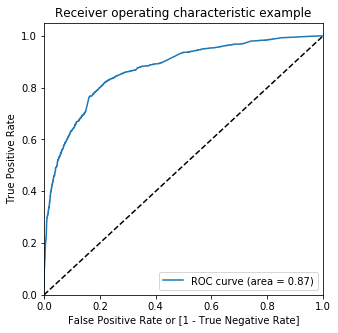

In [125]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


In [126]:
#cutoff point

In [127]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.901366,9196,1,1,1,1,1,1,1,1,1,1,1
1,0,0.430656,4696,0,1,1,1,1,1,0,0,0,0,0
2,0,0.467891,3274,0,1,1,1,1,1,0,0,0,0,0
3,0,0.066269,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.617250,1667,1,1,1,1,1,1,1,1,0,0,0


In [128]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.569491  0.966876  0.325348
0.2   0.2  0.719643  0.888889  0.615662
0.3   0.3  0.789213  0.834382  0.761463
0.4   0.4  0.808361  0.767715  0.833333
0.5   0.5  0.798787  0.648218  0.891293
0.6   0.6  0.795277  0.579036  0.928130
0.7   0.7  0.779799  0.494340  0.955178
0.8   0.8  0.756183  0.399161  0.975528
0.9   0.9  0.719004  0.276730  0.990726


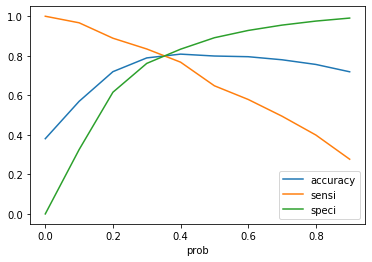

In [129]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [130]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.901366,9196,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.430656,4696,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.467891,3274,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.066269,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.617250,1667,1,1,1,1,1,1,1,1,0,0,0,1


In [131]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.901366,9196,1,90
1,0,0.430656,4696,1,43
2,0,0.467891,3274,1,47
3,0,0.066269,2164,0,7
4,1,0.617250,1667,1,62


In [132]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.901366,9196,1,90
1,0,0.430656,4696,1,43
2,0,0.467891,3274,1,47
3,0,0.066269,2164,0,7
4,1,0.617250,1667,1,62


In [133]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7892133397159725

In [134]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2956,  926],
       [ 395, 1990]])

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8343815513626834

In [137]:
# calculate specificity
TN / float(TN+FP)


0.7614631633178773

In [138]:
# Accuracy : 78.92%
# Sensitivity : 83.43%
# Specificity : 76.14%

In [139]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2385368366821226


In [140]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6824417009602195


In [141]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8821247388839153


In [142]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2956,  926],
       [ 395, 1990]])

In [143]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6824417009602195

In [144]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8343815513626834

In [145]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6824417009602195

In [146]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8343815513626834

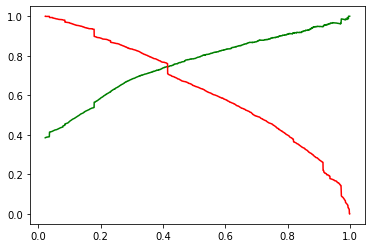

In [147]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [148]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [149]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Modified
7681,-0.311318,0,0,1,0,0,0,0,1,0
984,-0.550262,0,0,0,1,0,0,0,1,1
8135,0.812462,0,0,1,0,0,0,0,1,0
6915,-0.628665,0,0,0,0,0,0,0,0,0
2712,-0.421456,0,0,0,0,0,0,0,0,0


In [150]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2686, 11)

In [151]:
# test set

In [152]:
y_test_pred = res.predict(X_test_sm)

In [153]:
y_test_pred[:10]

7681    0.369053
984     0.214728
8135    0.627193
6915    0.214811
2712    0.249484
244     0.147343
4698    0.188563
8287    0.034273
6791    0.479136
8970    0.137750
dtype: float64

In [154]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7681,0.369053
984,0.214728
8135,0.627193
6915,0.214811
2712,0.249484


In [155]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

In [156]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [158]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.369053
1,0,984,0.214728
2,0,8135,0.627193
3,0,6915,0.214811
4,1,2712,0.249484


In [159]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [160]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.369053
1,0,984,0.214728
2,0,8135,0.627193
3,0,6915,0.214811
4,1,2712,0.249484


In [161]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [162]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.369053,37
1,984,0,0.214728,21
2,8135,0,0.627193,63
3,6915,0,0.214811,21
4,2712,1,0.249484,25


In [163]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [164]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.369053,37,1
1,984,0,0.214728,21,0
2,8135,0,0.627193,63,1
3,6915,0,0.214811,21,0
4,2712,1,0.249484,25,0


In [165]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7892777364110201

In [166]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1271,  405],
       [ 161,  849]])

In [167]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [168]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8405940594059406

In [169]:
# Let us calculate specificity
TN / float(TN+FP)

0.7583532219570406

In [170]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6770334928229665

In [171]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8405940594059406

In [172]:
# Accuracy : 78.92%
# Sensitivity : 84.05%
# Specificity : 75.83%

In [173]:
# values obtained for Train & Test dataset:

# Train Data:
# Accuracy : 78.92%
# Sensitivity : 83.43%
# Specificity : 76.14%
    
    
# Test Data: 
# Accuracy : 78.92%
# Sensitivity : 84.05%
# Specificity : 75.83%